# Exploring Dandiset 001335: Neuropixels Recordings

This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please exercise caution when interpreting code or results.

## Overview

Dandiset 001335 contains Neuropixels recordings from the hippocampus of head-fixed mice during odor presentations. The researchers used various odor sequences to evoke neural responses recorded using Neuropixels probes.

## What This Notebook Covers

- Loading data using the DANDI API
- Visualizing Local Field Potential (LFP) data
- Providing guidance for further data analysis

## Required Packages

- pynwb
- h5py
- matplotlib
- remfile

## Loading the Dandiset

Load metadata and assets using the DANDI API.

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001335")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 1 assets in the dataset

First 5 assets:
- sub-M541/sub-M541_ecephys.nwb


## Loading LFP Data Using PyNWB

Demonstrates streaming data from a remote NWB file and extracting LFP data.

In [2]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/aca66db7-4c02-4453-8dcb-a179d44b1c5d/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

lfp_data = nwb.processing["ecephys"].data_interfaces["LFP"].data[:500, 0]

## Visualizing the LFP Data from Channel 0

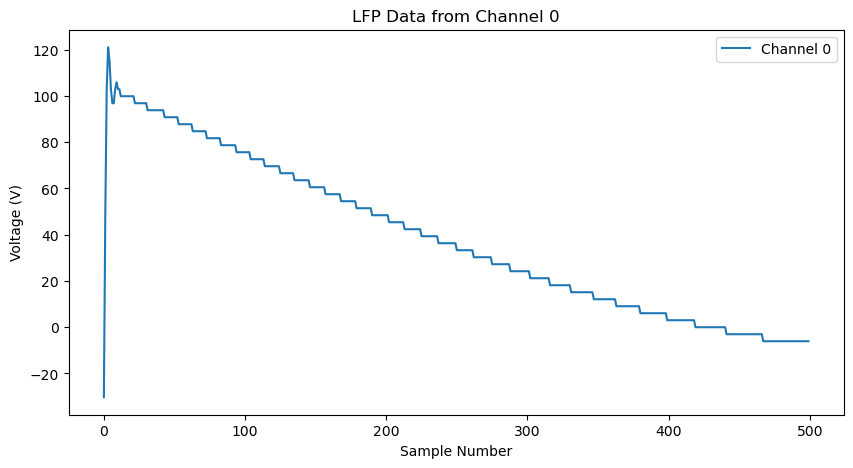

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(lfp_data, label='Channel 0')
plt.title('LFP Data from Channel 0')
plt.xlabel('Sample Number')
plt.ylabel('Voltage (V)')
plt.legend(loc='upper right')

plt.show()

io.close()
remote_file.close()

## Conclusion

This notebook serves as an introduction to exploring and visualizing electro-physiological data in a Dandiset. Users can extend this analysis to explore other datasets or mechanisms.